# VALIDATION (트레인셋 : 0414까지, 검증셋 : 0415부터 0428까지)

## 추후 일주일씩 밀 예정

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')
from matplotlib import rc, font_manager
rc('font',family='NanumSquareR')
import os
from sklearn.metrics import mean_squared_error

In [ ]:
os.chdir("C://Users//MinSu//Desktop//kt_competition//0429")

In [ ]:
Y_df=pd.read_excel("Y_.xlsx")

In [ ]:
Y_df.head()

,date,oversea_inflow,일일_확진자,중국,중국_외_아시아,유럽,미주,아프리카,호주,검역단계,지역사회,내국인,외국인
0,2020-01-20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-23,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Y=Y_df["oversea_inflow"]

In [ ]:
Y=Y.drop(101)

In [ ]:
len(Y)

101

In [ ]:
daily_patient=[]
for i in range(len(Y)-1):
    daily_patient.append(Y[i+1]-Y[i])

In [ ]:
len(daily_patient) #1월20일 ~ 4월28일 일일 확진자(해외)

100

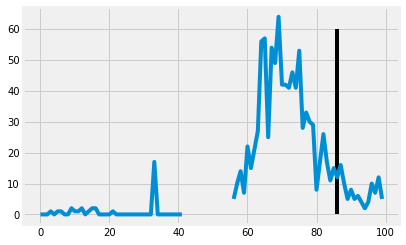

In [ ]:
plt.plot(daily_patient)
plt.vlines(86,0,60)

# Let's Validate : Compare with real_Y

In [ ]:
real_Y=daily_patient[86:100] #4월 15일~ 4월 28일까지 실제 확진자

In [ ]:
real_Y=np.array(real_Y)

In [ ]:
len(real_Y)

14

In [ ]:
mean_ts=pd.Series(daily_patient[:86]).mean() #하나의 예시, 1월 20일 ~ 4월 14일까지 확진자 평균모델 (NULL MODEL)
pred=np.repeat(mean_ts,14)
pred

array([13.01388889, 13.01388889, 13.01388889, 13.01388889, 13.01388889,
       13.01388889, 13.01388889, 13.01388889, 13.01388889, 13.01388889,
       13.01388889, 13.01388889, 13.01388889, 13.01388889])

In [ ]:
score=100*(1-(((pred-real_Y)**2).sum())/((real_Y**2).sum())) # KT 공모전 score 산출 공식

In [ ]:
score

38.634082497171796